In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input  # Asegúrate de importar Input aquí


### Carga de datos

In [3]:
df = pd.read_csv('./Impact_of_Remote_Work_on_Mental_Health.csv')
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [4]:
df.drop(columns=['Work_Life_Balance_Rating', 'Number_of_Virtual_Meetings', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work'], inplace=True)
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,Medium,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,Medium,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,Medium,Anxiety,No,No Change,Unsatisfied,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,High,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,High,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,High,Burnout,Yes,Decrease,Neutral,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,Low,Depression,Yes,Decrease,Satisfied,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,High,Burnout,No,Increase,Satisfied,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,Low,NaN,Yes,Increase,Unsatisfied,Daily,Average,Asia


In [5]:
df.dropna(inplace=True)
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,Medium,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,Medium,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,Low,Anxiety,Yes,Decrease,Neutral,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,Low,Depression,Yes,Decrease,Neutral,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,High,Depression,Yes,Decrease,Neutral,Weekly,Good,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,Low,Burnout,Yes,Increase,Satisfied,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,High,Anxiety,No,No Change,Satisfied,Daily,Poor,Africa
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,Medium,Burnout,Yes,Increase,Neutral,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,High,Burnout,Yes,Decrease,Neutral,Weekly,Average,Asia


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f'Tamaño del set de entrenamiento: {train_df.shape}')
print(f'Tamaño del set de prueba: {test_df.shape}')

Tamaño del set de entrenamiento: (2061, 16)
Tamaño del set de prueba: (516, 16)


### Árboles de desición

In [6]:
# Convertir variables categóricas a numéricas (puedes usar pd.get_dummies para variables categóricas)
df_encoded = pd.get_dummies(df, columns=['Job_Role', 'Work_Location', 'Stress_Level'])

# Definir variables independientes (X) y dependiente (y)
X = df_encoded[['Stress_Level_Medium', 'Stress_Level_High', 'Job_Role_Sales', 'Work_Location_Hybrid', 'Work_Location_Onsite', 'Work_Location_Remote']]
y = df_encoded['Access_to_Mental_Health_Resources']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = model.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.49


###### Indica que el modelo de clasificación tiene una precisión del 49% para predecir si un empleado tiene acceso a recursos de salud mental, basándose en variables como el nivel de estrés, el rol laboral y la ubicación de trabajo. Esto significa que el modelo acierta en el 49% de los casos del conjunto de prueba. Sin embargo, una precisión de 49% es relativamente baja, lo que sugiere que el modelo necesita mejoras, como ajustar sus parámetros, probar con otros algoritmos o incluir más variables relevantes para obtener mejores resultados.

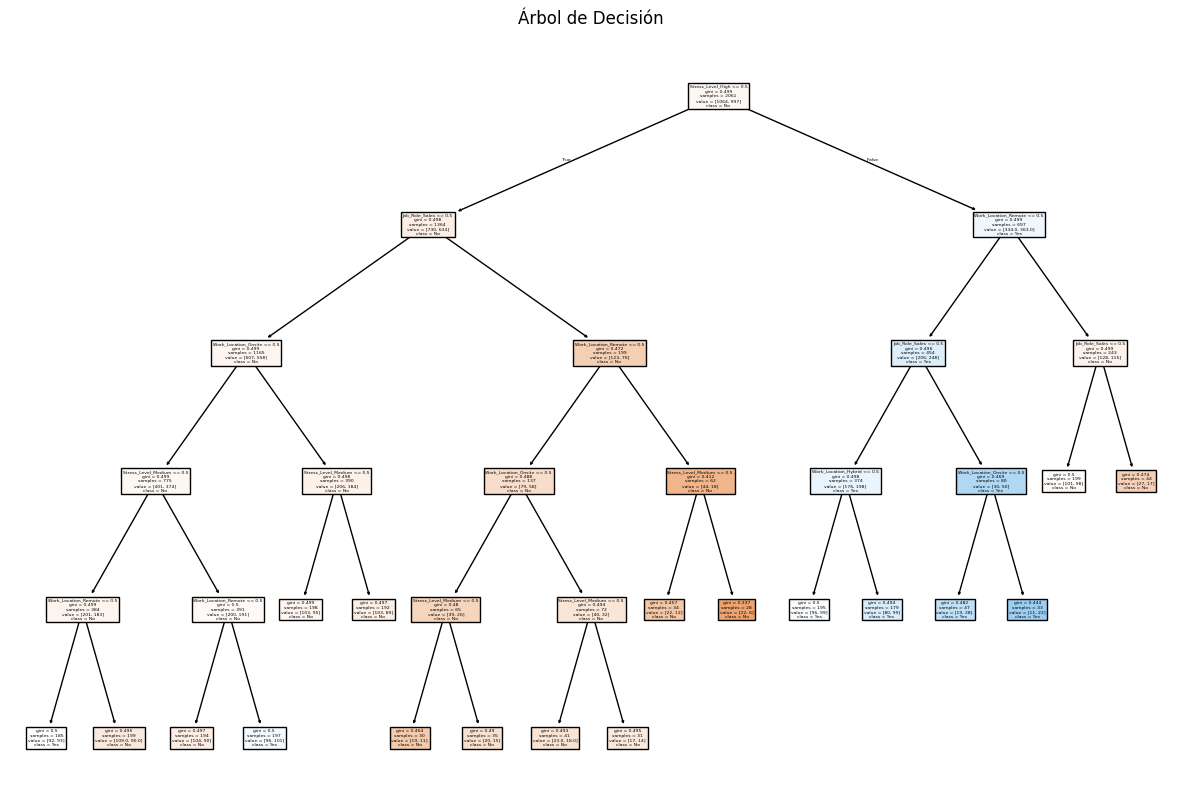

In [7]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Árbol de Decisión")
plt.show()

### K-means

In [8]:
# Convertir las columnas categóricas en variables numéricas con get_dummies
df_encoded = pd.get_dummies(df, columns=['Stress_Level', 'Satisfaction_with_Remote_Work'])

# Seleccionar las columnas para el modelo (ya convertidas en numéricas)
X = df_encoded[['Hours_Worked_Per_Week', 'Stress_Level_Low', 'Stress_Level_Medium', 'Stress_Level_High',
                'Satisfaction_with_Remote_Work_Satisfied', 'Satisfaction_with_Remote_Work_Unsatisfied']]

# Crear el modelo KMeans y ajustarlo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Asignar los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Mostrar el DataFrame con el nuevo cluster
print(df[['Employee_ID', 'Cluster']])

     Employee_ID  Cluster
0        EMP0001        2
1        EMP0002        0
6        EMP0007        0
9        EMP0010        0
12       EMP0013        1
...          ...      ...
4991     EMP4992        0
4992     EMP4993        2
4994     EMP4995        0
4995     EMP4996        1
4997     EMP4998        2

[2577 rows x 2 columns]


##### El resultado muestra que cada empleado ha sido asignado a uno de los **3 clusters** creados por el algoritmo K-Means. Estos clusters agrupan a los empleados según características como horas trabajadas, nivel de estrés y satisfacción con el trabajo remoto. Cada número en la columna "Cluster" representa el grupo al que pertenece cada empleado.

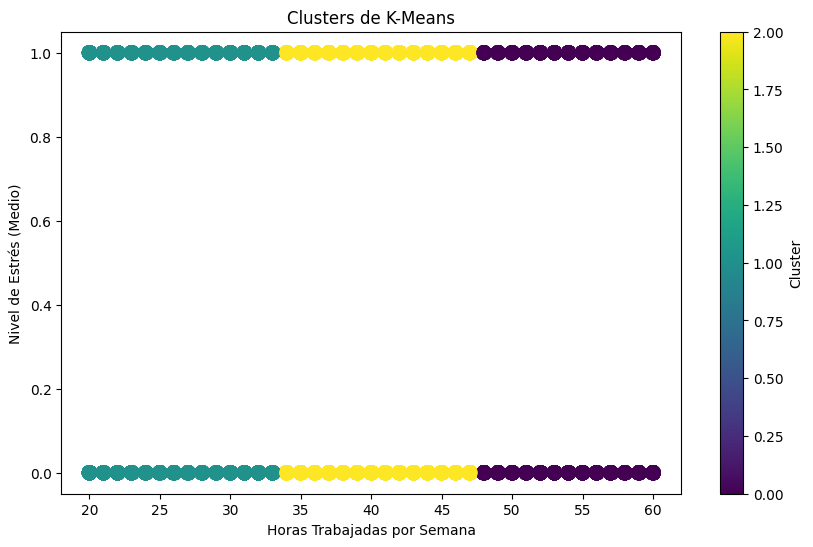

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Hours_Worked_Per_Week'], X['Stress_Level_Medium'], c=df['Cluster'], cmap='viridis', marker='o', s=100)
plt.title("Clusters de K-Means")
plt.xlabel('Horas Trabajadas por Semana')
plt.ylabel('Nivel de Estrés (Medio)')
plt.colorbar(label='Cluster')
plt.show()

###### La gráfica muestra una distribución en la que los empleados están divididos aproximadamente en dos grupos: una mitad se concentra en la parte superior y la otra mitad en la parte inferior. Esto indica que hay dos tendencias claras en relación con el **nivel de estrés medio**. Los empleados en la parte superior tienen un nivel de estrés medio elevado, mientras que los de la parte inferior presentan un nivel de estrés medio bajo o nulo. Esta división sugiere que las **horas trabajadas por semana** y el **nivel de estrés** influyen en la formación de estos clusters, revelando patrones distintos entre los grupos de empleados.

### Regresión lineal

In [10]:
# Verifica el conteo de valores nulos en y
print(y.isnull().sum())


0


In [11]:
# Imprimir valores únicos de Productivity_Change
print(df_encoded['Productivity_Change'].unique())


['Decrease' 'Increase' 'No Change']


In [12]:
# Actualizar el mapeo para incluir todos los valores posibles
mapping = {
    'Decrease': -1,
    'No Change': 0,  # Agregamos este valor
    'Increase': 1
}

# Aplicar el mapeo
y = df_encoded['Productivity_Change'].map(mapping)

# Verifica nuevamente el conteo de valores nulos
print(y.isnull().sum())  # Debería ser 0 ahora


0


In [13]:
# Si y ahora no tiene NaNs, continuamos
if y.isnull().sum() == 0:
    # Eliminar filas con NaN en la variable dependiente
    df_cleaned = df_encoded.dropna(subset=['Productivity_Change'])

    # Define X
    X = df_cleaned[['Hours_Worked_Per_Week', 'Stress_Level_Low', 'Stress_Level_Medium', 'Stress_Level_High']]

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Verifica los NaNs en X_train e y_train
    print(X_train.isnull().sum())
    print(y_train.isnull().sum())

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
else:
    print("Aún hay NaNs en y.")


Hours_Worked_Per_Week    0
Stress_Level_Low         0
Stress_Level_Medium      0
Stress_Level_High        0
dtype: int64
0


[-1  1  0]
Precisión del modelo: -0.00


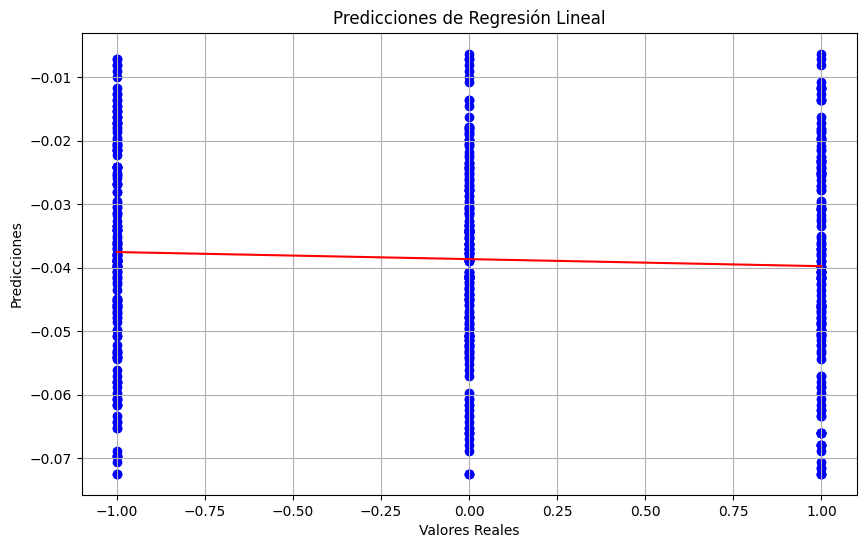

In [14]:
# Mapeo de Productivity_Change a numérico
mapping = {
    'Decrease': -1,
    'No Change': 0,
    'Increase': 1
}

# Asegúrate de que la columna no tenga NaN antes de mapear
df_encoded['Productivity_Change'] = df_encoded['Productivity_Change'].map(mapping)

# Eliminar filas con NaN en la variable dependiente
df_cleaned = df_encoded.dropna(subset=['Productivity_Change'])

# Verificar que no hay valores no numéricos en y
print(df_cleaned['Productivity_Change'].unique())  # Debe mostrar [-1, 0, 1]

# Definir variables dependientes (y) e independientes (X)
y = df_cleaned['Productivity_Change']
X = df_cleaned[['Hours_Worked_Per_Week', 'Stress_Level_Low', 'Stress_Level_Medium', 'Stress_Level_High']]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
score = model.score(X_test, y_test)
print(f"Precisión del modelo: {score:.2f}")

# Predicciones
y_pred = model.predict(X_test)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de Regresión Lineal')
plt.grid()
plt.show()


###### La precisión del modelo es cercana a 0, lo que indica que el modelo prácticamente no tiene capacidad predictiva. Esto puede deberse a que las variables independientes (Hours_Worked_Per_Week, Stress_Level_Low, Stress_Level_Medium, Stress_Level_High) no están explicando de manera adecuada los cambios en productividad o no hay una relación lineal significativa entre ellas y el cambio en productividad.

### Regresión logística

In [34]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded['Productivity_Change'] = df['Productivity_Change']


In [35]:
# 1. Dividir el conjunto de datos
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

print(f'Tamaño del set de entrenamiento: {train_df.shape}')
print(f'Tamaño del set de prueba: {test_df.shape}')

# 2. Definir variables dependientes (y) e independientes (X)
y_train = train_df['Productivity_Change']  # Verifica que esta columna esté presente
X_train = train_df.drop(columns='Productivity_Change')

y_test = test_df['Productivity_Change']
X_test = test_df.drop(columns='Productivity_Change')

# 3. Crear un pipeline con escalado y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('logistic', LogisticRegression(max_iter=1000))  # Modelo de regresión logística
])

# 4. Ajustar el modelo
pipeline.fit(X_train, y_train)

# 5. Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# 6. Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", class_report)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


Tamaño del set de entrenamiento: (2061, 2615)
Tamaño del set de prueba: (516, 2615)
Matriz de confusión:
 [[165   0   0]
 [  0 153   0]
 [  0   0 198]]
Informe de clasificación:
               precision    recall  f1-score   support

    Decrease       1.00      1.00      1.00       165
    Increase       1.00      1.00      1.00       153
   No Change       1.00      1.00      1.00       198

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516

Precisión del modelo: 1.00


##### El modelo de regresión logística alcanzó una precisión perfecta del 100%, lo que significa que clasificó correctamente todas las clases de Decrease, Increase y No Change sin errores. Esto podría interpretarse de dos maneras: por un lado, puede significar que el modelo está funcionando de manera óptima debido a la claridad de los patrones en los datos. Por otro lado, es posible que los resultados tan altos sean una señal de sobreajuste, lo que significa que el modelo podría no funcionar igual de bien con datos nuevos.

### Redes neuronales

In [40]:
# Seleccionar solo columnas numéricas para X
X = df.select_dtypes(include=[np.number])


In [43]:
# Convertir la variable objetivo a numérica
label_encoder = LabelEncoder()
df['Productivity_Change'] = label_encoder.fit_transform(df['Productivity_Change'])

# Seleccionar solo columnas numéricas para X
X = df.drop('Productivity_Change', axis=1).select_dtypes(include=[np.number])  # Características numéricas
y = df['Productivity_Change']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir X_train y y_train a float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Usar Input como la primera capa
model.add(Dense(64, activation='relu'))  # Primera capa oculta
model.add(Dense(32, activation='relu'))  # Segunda capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Usar EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')


Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3174 - loss: 0.4078 - val_accuracy: 0.3027 - val_loss: 0.0417
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3172 - loss: 0.0125 - val_accuracy: 0.3027 - val_loss: -0.0032
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3244 - loss: 0.0087 - val_accuracy: 0.3027 - val_loss: -0.0277
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3240 - loss: 0.0409 - val_accuracy: 0.3027 - val_loss: -0.0463
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3182 - loss: 0.1707 - val_accuracy: 0.3027 - val_loss: -0.0603
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3279 - loss: 0.1269 - val_accuracy: 0.3027 - val_loss: -0.0720
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3168 - loss: 0.0455 - val_accuracy: 0.3027 - val_loss: -0.0861
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 0.1624 - val_accura

###### Durante el entrenamiento de un modelo a lo largo de 50 épocas, se utilizó EarlyStopping, logrando precisiones de 30%-34% para entrenamiento y aproximadamente 30% para validación. La pérdida de entrenamiento fue de 0.4078, mostrando una tendencia a la baja, mientras que la validación presentó valores negativos, lo que sugiere problemas en el modelo, como sobreajuste o datos inadecuados.

### AD


Distribución de Género:
Gender
Female               664
Non-binary           642
Male                 641
Prefer not to say    630
Name: count, dtype: int64


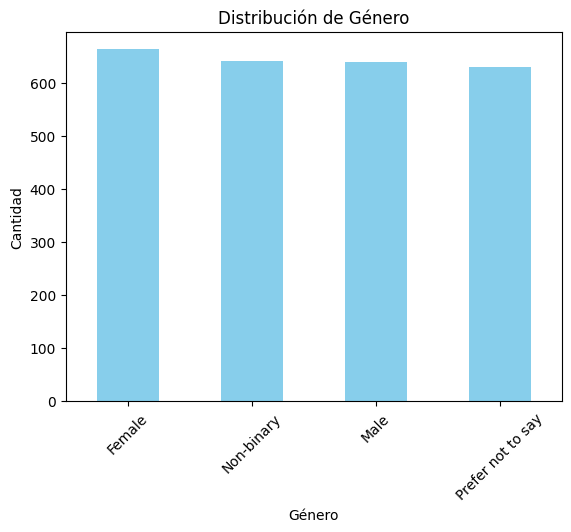

In [8]:
gender_counts = df['Gender'].value_counts()
print("\nDistribución de Género:")
print(gender_counts)

gender_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [9]:
stress_level_avg = df.groupby('Job_Role')['Stress_Level'].value_counts(normalize=True).unstack().fillna(0)
print("\nPromedio de Estrés por Rol de Trabajo:")
print(stress_level_avg)


Promedio de Estrés por Rol de Trabajo:
Stress_Level           High       Low    Medium
Job_Role                                       
Data Scientist     0.345946  0.313514  0.340541
Designer           0.378082  0.345205  0.276712
HR                 0.310881  0.334197  0.354922
Marketing          0.295455  0.357143  0.347403
Project Manager    0.344140  0.296758  0.359102
Sales              0.358056  0.337596  0.304348
Software Engineer  0.317416  0.323034  0.359551


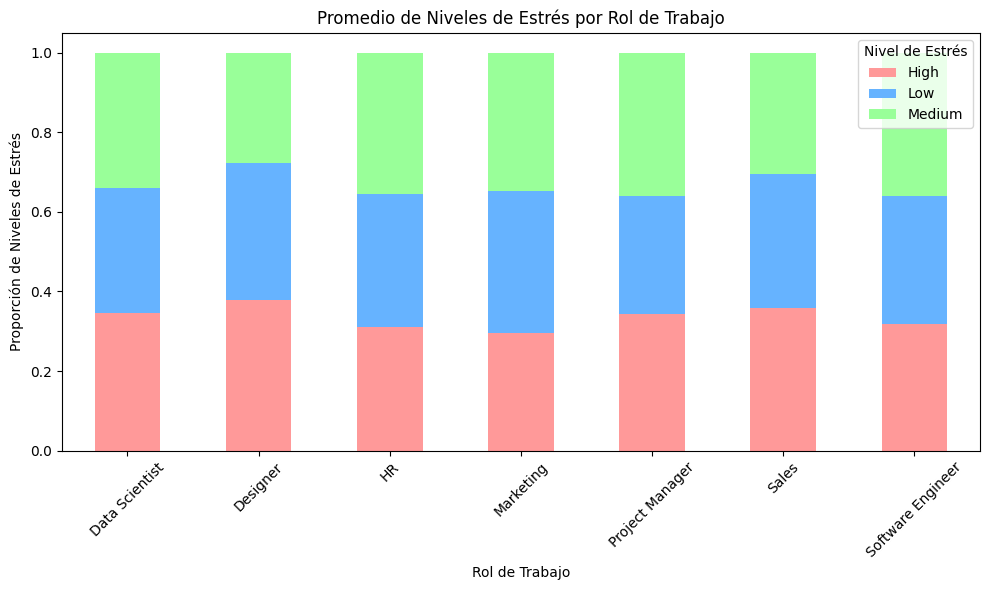

In [21]:
stress_level_avg = df.groupby('Job_Role')['Stress_Level'].value_counts(normalize=True).unstack().fillna(0)

stress_level_avg.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99'], figsize=(10, 6))
plt.title('Promedio de Niveles de Estrés por Rol de Trabajo')
plt.xlabel('Rol de Trabajo')
plt.ylabel('Proporción de Niveles de Estrés')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Estrés')
plt.tight_layout()
plt.show()

In [16]:
mental_health_exp = df.groupby('Mental_Health_Condition')['Years_of_Experience'].mean()
print("\nPromedio de Años de Experiencia por Condición de Salud Mental:")
print(mental_health_exp)


Promedio de Años de Experiencia por Condición de Salud Mental:
Mental_Health_Condition
Anxiety       17.529543
Burnout       17.640515
Depression    18.135593
Name: Years_of_Experience, dtype: float64


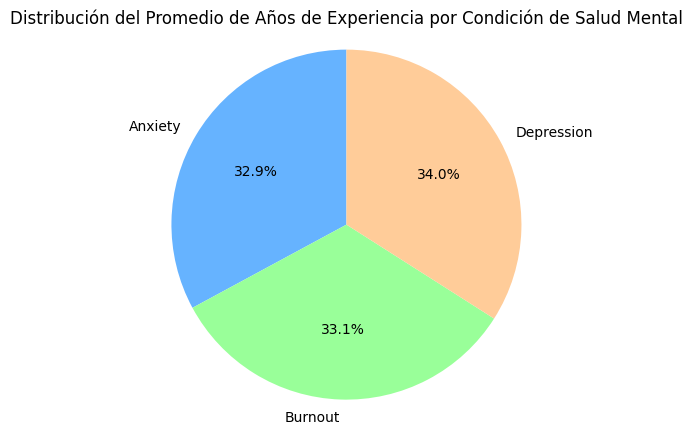

In [22]:
plt.figure(figsize=(8, 5))
plt.pie(mental_health_exp, labels=mental_health_exp.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribución del Promedio de Años de Experiencia por Condición de Salud Mental')
plt.axis('equal')
plt.show()


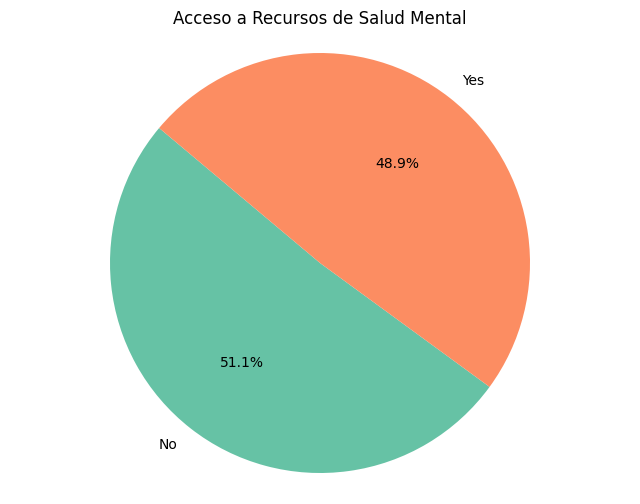

In [23]:
access_counts = df['Access_to_Mental_Health_Resources'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Acceso a Recursos de Salud Mental')
plt.axis('equal')
plt.show()
